# Polinomial Regression

### Authors:
- Adrián Bedón
- Pablo Chasipanta
- José Miguel Merlo
- Dennis Ocaña
- Xavier Ramos

## 1. Polinomial Regression

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [32]:
# Load the dataset from the URL
url = "https://raw.githubusercontent.com/Machine1314/natural_computing/main/data_regression.csv"
df = pd.read_csv(url)

#df = (df - df.min()) / (df.max() - df.min())

print(df.head())

# Extract the independent variable (X) and dependent variable (y)
X = df[['xi']].values 
y = df['yi'].values

   i    xi     yi
0  1   6.6  -45.4
1  2  10.1 -176.6
2  3   8.9 -127.1
3  4   6.0  -31.1
4  5  13.3 -366.6


Mean Squared Error: 3.7058691174351153
R-squared: 0.9997859744180885


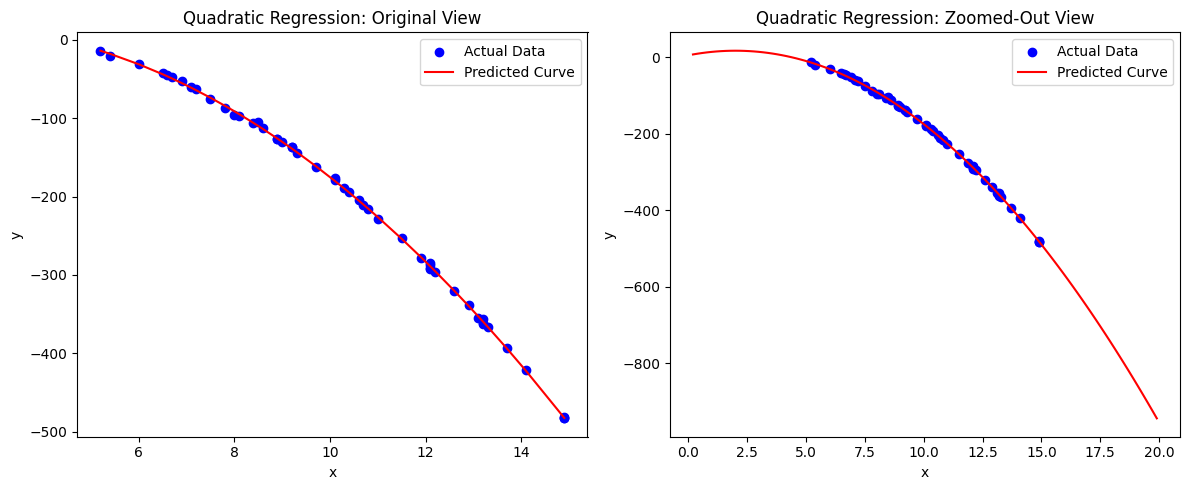

In [33]:
# Create polynomial features (degree=2 for quadratic)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Create and fit the linear regression model to the polynomial features
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions
y_pred = model.predict(X_poly)

# Evaluate the model using metrics like MSE and R-squared
mse = mean_squared_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Sort the data points before plotting the predicted curve
sort_idx = np.argsort(X[:, 0])  # Get the indices to sort X
X_sorted = X[sort_idx]
y_pred_sorted = y_pred[sort_idx]

# Create a zoomed-out view
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))  # 1 row, 2 columns

# Original plot (ax1) - same as before
ax1.scatter(X, y, color='blue', label='Actual Data')
ax1.plot(X_sorted, y_pred_sorted, color='red', label='Predicted Curve')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_title('Quadratic Regression: Original View')
ax1.legend()

# Zoomed-out plot (ax2)
x_range = np.linspace(X.min() - 5, X.max() + 5, 100)  # Extended x-range
X_range_poly = poly.transform(x_range.reshape(-1, 1))  # Transform for prediction
y_range_pred = model.predict(X_range_poly)

ax2.scatter(X, y, color='blue', label='Actual Data')
ax2.plot(x_range, y_range_pred, color='red', label='Predicted Curve')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_title('Quadratic Regression: Zoomed-Out View')
ax2.legend()

plt.tight_layout()  # Adjust layout for better spacing
plt.show()

## 2. Numerical Solution

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
df = pd.read_csv('https://raw.githubusercontent.com/Machine1314/natural_computing/main/data_regression.csv')

x_min, x_max = df['xi'].min(), df['xi'].max()
y_min, y_max = df['yi'].min(), df['yi'].max()

df['xi'] = (df['xi'] - x_min) / (x_max - x_min)
df['yi'] = (df['yi'] - y_min) / (y_max - y_min)

In [36]:
def reverse_scaling(predictions, y_min, y_max):
    predictions = np.array(predictions)
    return predictions * (y_max - y_min) + y_min

In [37]:
def calculate_metrics_original(points, a0, a1, a2, y_min, y_max):
    y_true_normalized = points['yi']
    y_pred_normalized = a0 + a1 * points['xi'] + a2 * points['xi']**2
    
    y_true_original = reverse_scaling(y_true_normalized, y_min, y_max)
    y_pred_original = reverse_scaling(y_pred_normalized, y_min, y_max)

    mse = np.mean((y_true_original - y_pred_original)**2)
    ss_total = np.sum((y_true_original - np.mean(y_true_original))**2)
    ss_residual = np.sum((y_true_original - y_pred_original)**2)
    r_squared = 1 - (ss_residual / ss_total)
    
    return mse, r_squared

In [38]:
def gradient_descent_quadratic(a0, a1, a2, points, L):
    a0_gradient = 0
    a1_gradient = 0
    a2_gradient = 0
    n = len(points)
    for i in range(n):
        x = points.iloc[i]['xi']
        y = points.iloc[i]['yi']
        prediction = a0 + a1 * x + a2 * x**2
        error = y - prediction
        a0_gradient += -(2 / n) * error
        a1_gradient += -(2 / n) * x * error
        a2_gradient += -(2 / n) * x**2 * error
    a0 -= L * a0_gradient
    a1 -= L * a1_gradient
    a2 -= L * a2_gradient
    return a0, a1, a2

In [39]:
learning_rates = [0.1, 0.5, 0.7]
steps = [10, 20, 50, 100, 500]

results = []

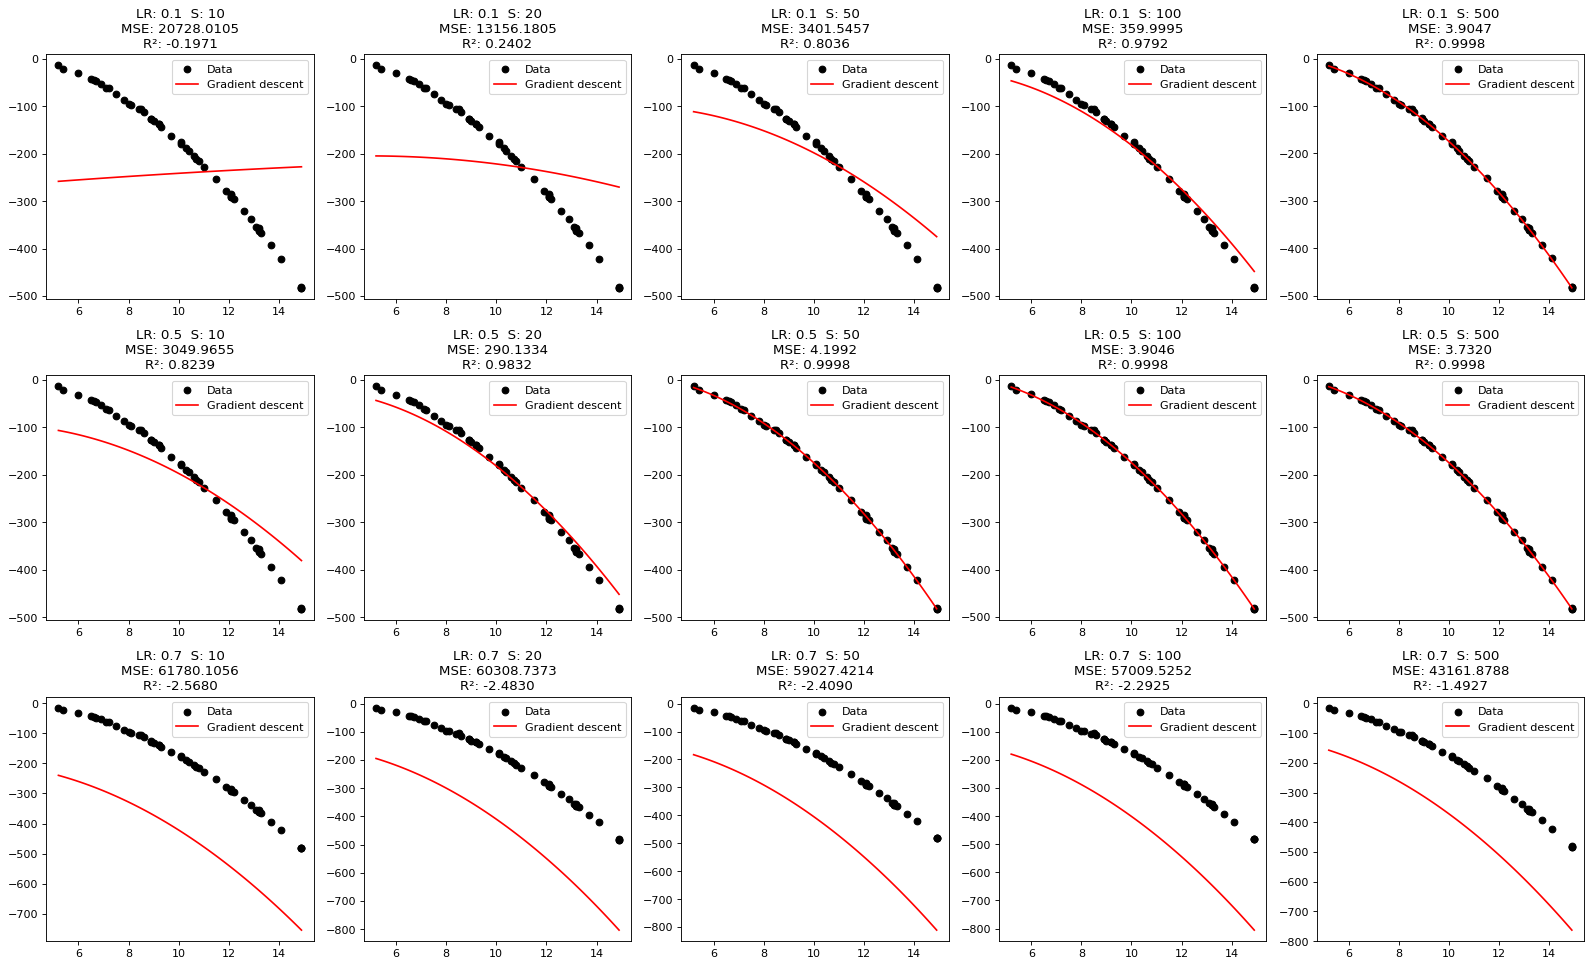

In [40]:
fig = plt.figure(figsize=(20, 20), dpi=80)
for cont1, learn in enumerate(learning_rates):
    for cont2, step in enumerate(steps):
        a0, a1, a2 = 0, 0, 0
        L = learn
        epochs = step

        for _ in range(epochs):
            a0, a1, a2 = gradient_descent_quadratic(a0, a1, a2, df, L)

        linspace = np.linspace(df['xi'].min(), df['xi'].max(), 100)
        predictions_normalized = [a0 + a1 * x + a2 * x**2 for x in linspace]

        predictions_original = reverse_scaling(predictions_normalized, y_min, y_max)
        linspace_original = linspace * (x_max - x_min) + x_min

        mse_original, r_squared_original = calculate_metrics_original(df, a0, a1, a2, y_min, y_max)
        results.append({'Learning Rate': learn, 'Steps': step, 'MSE': mse_original, 'R-squared': r_squared_original})

        ax1 = plt.subplot2grid((5, 5), (cont1, cont2))
        ax1.scatter(df['xi'] * (x_max - x_min) + x_min, df['yi'] * (y_max - y_min) + y_min, label='Data', color="black")
        ax1.title.set_text(f'LR: {learn}  S: {step}\nMSE: {mse_original:.4f}\nR²: {r_squared_original:.4f}')
        ax1.plot(linspace_original, predictions_original, color="red", label='Gradient descent')
        ax1.legend()

plt.tight_layout()
plt.show()

## 3. MLP

In [41]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

In [42]:
# Load the dataset from the URL
url = "https://raw.githubusercontent.com/Machine1314/natural_computing/main/data_regression.csv"
df = pd.read_csv(url)

# Extract the independent variable (X) and dependent variable (y)
X = df[['xi']].values 
y = df['yi'].values

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
model = keras.Sequential([
    layers.Input(shape=(1,)),
    layers.Dense(64, activation='relu'), 
    layers.Dense(32, activation='relu'),
    layers.Dense(1) 
])

In [44]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=1000, batch_size=100, validation_split=0.1, verbose=0)

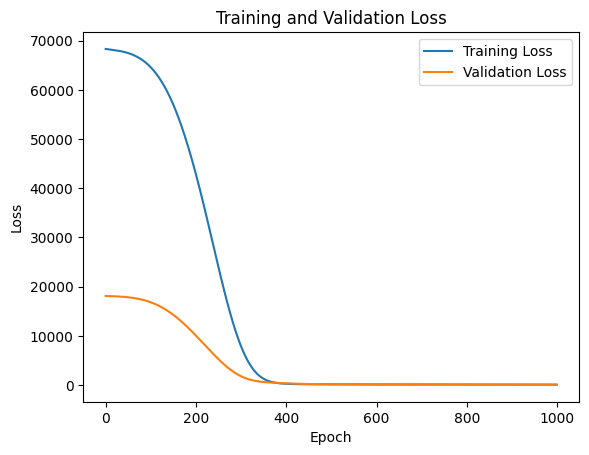

In [45]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [50]:
loss, mae = model.evaluate(X_test, y_test, verbose=0)
print(f"Mean Absolute Error on Test Set: {mae}")

Mean Absolute Error on Test Set: 10.428869247436523


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


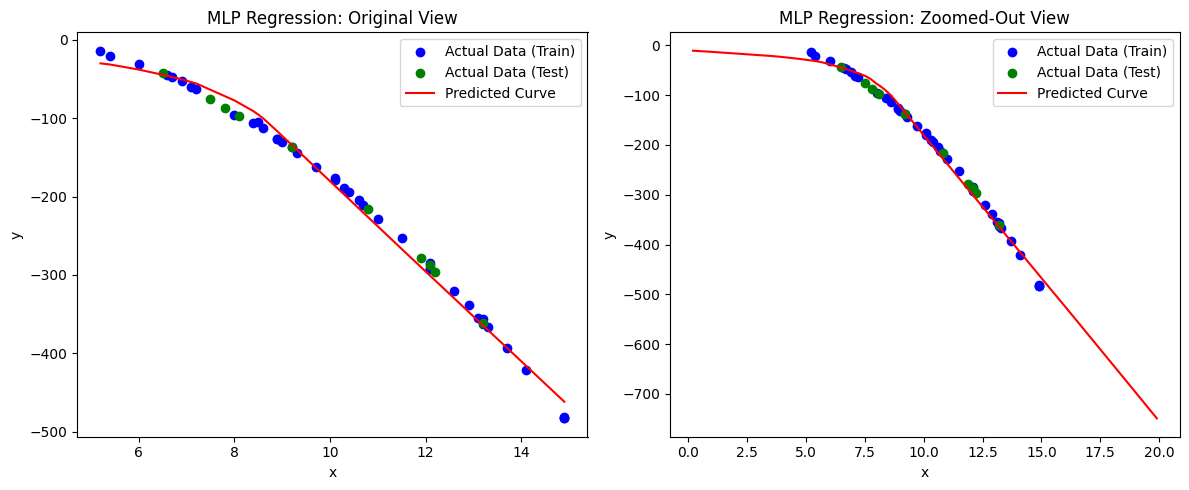

In [47]:
# Predict on the training data and sort for plotting
y_train_pred = model.predict(X_train)
# Sort the training data points for a smooth curve
sort_idx_train = np.argsort(scaler.inverse_transform(X_train)[:, 0])  
X_train_sorted = scaler.inverse_transform(X_train)[sort_idx_train]
y_train_pred_sorted = y_train_pred[sort_idx_train]

# Original view plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(scaler.inverse_transform(X_train), y_train, color='blue', label='Actual Data (Train)')
plt.scatter(scaler.inverse_transform(X_test), y_test, color='green', label='Actual Data (Test)')
# Plot the sorted predicted values for a smooth curve
plt.plot(X_train_sorted, y_train_pred_sorted, color='red', label='Predicted Curve')  
plt.xlabel('x')
plt.ylabel('y')
plt.title('MLP Regression: Original View')
plt.legend()

# Zoomed-out view plot
plt.subplot(1, 2, 2)  # Second subplot
x_range = np.linspace(X.min() - 5, X.max() + 5, 100).reshape(-1, 1)
x_range_scaled = scaler.transform(x_range)
y_range_pred = model.predict(x_range_scaled)

plt.scatter(scaler.inverse_transform(X_train), y_train, color='blue', label='Actual Data (Train)')
plt.scatter(scaler.inverse_transform(X_test), y_test, color='green', label='Actual Data (Test)')
plt.plot(x_range, y_range_pred, color='red', label='Predicted Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.title('MLP Regression: Zoomed-Out View')
plt.legend()

plt.tight_layout()
plt.show()

## Análisis de resultados

### Análisis Comparativo de Modelos de Regresión

El objetivo de este análisis es comparar tres modelos aplicados a un problema de regresión cuadrática: **Regresión Polinómica**, **Descenso por Gradiente** y un **Perceptrón Multicapa (MLP)**. Se evaluará el comportamiento de cada modelo en función de los datos específicos utilizados y los resultados obtenidos en este caso.

#### Regresión Polinómica

En este modelo, la regresión polinómica logró un excelente ajuste a los datos de entrenamiento, con un error cuadrático medio (MSE) de **3.7059** y un valor de R-cuadrado de **0.9998**. Estos resultados indican que el modelo captura casi toda la variabilidad en la variable dependiente y ajusta perfectamente los datos dentro del rango observado. La curva predicha sigue de manera precisa la distribución cuadrática de los datos originales.

Sin embargo, al analizar el comportamiento fuera del rango de entrenamiento (vista ampliada), el modelo muestra divergencias significativas. Esto se debe a la naturaleza estricta de los términos cuadráticos, como \(x^2\), que provocan un crecimiento excesivo en los valores predichos cuando \(x\) se aleja de los valores de entrenamiento. Este comportamiento refleja una limitación inherente del modelo: su enfoque en la exactitud dentro del rango observado no se traduce en una capacidad para generalizar más allá del mismo.

#### Descenso por Gradiente

El descenso por gradiente presentó un desempeño comparable al de la regresión polinómica cuando se configuraron hiperparámetros óptimos (tasa de aprendizaje de **0.5** y al menos **50 pasos**). En estas condiciones, el modelo alcanzó un MSE cercano a **3.904** y un valor de R-cuadrado de **0.9998**, lo que indica que también capturó de manera precisa la relación cuadrática dentro del rango de entrenamiento.

Cuando la tasa de aprendizaje fue demasiado baja o el número de pasos insuficiente, el modelo no logró converger completamente, lo que resultó en ajustes deficientes y valores de error elevados. Por otro lado, tasas de aprendizaje altas (como **0.7**) llevaron a inestabilidad, con curvas que divergieron de la solución óptima. Este comportamiento demuestra cómo el rendimiento del descenso por gradiente depende fuertemente de la configuración de hiperparámetros.

En la vista ampliada, el modelo muestra comportamientos extrapolados similares a los de la regresión polinómica, con divergencias marcadas fuera del rango de entrenamiento. Esto refleja su dependencia en los términos cuadráticos aprendidos y sus limitaciones para generalizar en contextos extrapolados.

#### Perceptrón Multicapa (MLP)

El MLP presentó un enfoque más flexible y logró capturar patrones complejos en los datos. Dentro del rango de entrenamiento, sus predicciones fueron razonables; sin embargo, su error absoluto medio (MAE) en el conjunto de prueba fue de **10.4289**, notablemente mayor que el MSE de los modelos anteriores. Este error indica que, aunque el modelo logra un ajuste razonable, no supera a los enfoques cuadráticos en términos de precisión en este caso específico.

A pesar de esto, el MLP mostró un comportamiento superior en la vista ampliada. En lugar de divergir severamente como los otros modelos, sus predicciones extrapoladas permanecieron más suaves y plausibles. Esto se debe a la flexibilidad de la arquitectura del MLP, que permite aprender una representación más amplia de los datos sin depender estrictamente de términos cuadráticos. Sin embargo, esta flexibilidad también implica una mayor sensibilidad al tamaño del conjunto de datos y a la configuración de hiperparámetros, lo que puede explicar el mayor error en el conjunto de prueba.

#### Observaciones Comparativas

Los resultados obtenidos reflejan las fortalezas y debilidades de cada modelo en este caso. La regresión polinómica y el descenso por gradiente lograron los mejores ajustes a los datos de entrenamiento, con un bajo MSE y un R-cuadrado cercano a 1. No obstante, ambos modelos mostraron limitaciones claras al extrapolar fuera del rango observado, donde sus predicciones se desviaron significativamente de patrones razonables.

El MLP, por otro lado, presentó un mayor error en el conjunto de prueba, pero demostró una capacidad superior para generalizar en regiones extrapoladas. Esto subraya su potencial para manejar relaciones más complejas y evitar divergencias extremas. Sin embargo, para este conjunto de datos específico, donde la relación subyacente es claramente cuadrática, los modelos basados en cuadráticas (regresión polinómica y descenso por gradiente) son más adecuados por su simplicidad y precisión.

